## Import Library

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Read dataset

In [172]:
survey_data=pd.read_csv("CPE_Survey_data.csv",chunksize=10000)
cpe_data=pd.concat(survey_data)
acr_data=pd.read_csv("ACR_FY22H1.csv",chunksize=10000)
revenue_data=pd.concat(acr_data)

In [173]:
cpe_data.head() # It is useful for quickly testing if your object(columns) has the right type of data in it.

,MsSalesTopParentId,AreaOriginal,Segment,Wave,Category,QuestionFullLabel,Value,NumericValue
0,18502603.0,France,Strategic,FY22 Q3,Perceptions of Microsoft,Company I trust - Microsoft,Strongly Agree,5.0
1,1438314.0,Japan,SMC Corporate,FY22 Q3,Overall Satisfaction,Overall Satisfaction - Microsoft,Somewhat Satisfied,3.0
2,1104955.0,ANZ,Strategic,FY22 Q3,Account Team Quality,Account Team Quality - Microsoft,Somewhat Dissatisfied,2.0
3,653719.0,United States,SMC Corporate,FY22 Q2,Account Team Quality,Account Team Quality - Microsoft,Don't Know,NaN
4,13322508.0,Greater China,SMC Corporate,FY22 Q2,Perceptions of Microsoft,Company I trust - Microsoft,Strongly Agree,5.0


In [174]:
revenue_data.head()

,TPID,Area,FY22-Q1
0,54,United States,1480709
1,87,United States,578725
2,95,United States,54061
3,104,United States,63444
4,1805,United States,120389


In [175]:
#rename the column name acc to merge data
cpe_data.rename(columns={"MsSalesTopParentId":"TPID"},inplace=True)

In [176]:
cpe_data.head()

,TPID,AreaOriginal,Segment,Wave,Category,QuestionFullLabel,Value,NumericValue
0,18502603.0,France,Strategic,FY22 Q3,Perceptions of Microsoft,Company I trust - Microsoft,Strongly Agree,5.0
1,1438314.0,Japan,SMC Corporate,FY22 Q3,Overall Satisfaction,Overall Satisfaction - Microsoft,Somewhat Satisfied,3.0
2,1104955.0,ANZ,Strategic,FY22 Q3,Account Team Quality,Account Team Quality - Microsoft,Somewhat Dissatisfied,2.0
3,653719.0,United States,SMC Corporate,FY22 Q2,Account Team Quality,Account Team Quality - Microsoft,Don't Know,NaN
4,13322508.0,Greater China,SMC Corporate,FY22 Q2,Perceptions of Microsoft,Company I trust - Microsoft,Strongly Agree,5.0


In [177]:
pivot_data1=cpe_data.pivot_table(columns='QuestionFullLabel', index=['TPID','Segment','AreaOriginal'], values='NumericValue')

In [178]:
pivot_data1=pivot_data1.reset_index() # way to quickly summarize large amounts of data, example-one user give two N.responded
                                    # then convrting pivot take average of n. value

In [179]:
pivot_data1

QuestionFullLabel,TPID,Segment,AreaOriginal,Account Team Quality - Microsoft,Company I trust - Microsoft,Overall Satisfaction - Microsoft,"Their vision and capabilities position them as a key partner in driving my most strategic, high-profile initiatives over the next three to five years - Microsoft",They are a strategic partner to my organization - Microsoft
0,83.0,SMC Corporate,United States,NaN,5.000000,4.000000,NaN,NaN
1,87.0,Major,United States,2.666667,3.666667,2.500000,NaN,NaN
2,95.0,Major,United States,4.000000,4.500000,4.000000,NaN,NaN
3,1805.0,Major,United States,4.000000,2.500000,3.333333,NaN,NaN
4,1808.0,Major,United States,NaN,5.000000,4.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
8989,73452710.0,Major,United States,4.000000,5.000000,4.000000,NaN,NaN
8990,74110381.0,Major,Western Europe,NaN,NaN,2.000000,NaN,NaN
8991,84043553.0,SMC Corporate,APAC,NaN,5.000000,4.000000,NaN,NaN
8992,84452555.0,Major,Western Europe,NaN,4.000000,3.000000,NaN,NaN


In [180]:
pivot_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8994 entries, 0 to 8993
Data columns (total 8 columns):
 #   Column                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                             --------------  -----  
 0   TPID                                                                                                                                                               8994 non-null   float64
 1   Segment                                                                                                                                                            8994 non-null   object 
 2   AreaOriginal                                                                                                             

In [181]:
# convert into int data like 3.6- 4, 3.2- 3
n=0.00000001
pivot_data1.iloc[:,3:]=round(pivot_data1.iloc[:,3:]+n)

In [182]:
pivot_data1

QuestionFullLabel,TPID,Segment,AreaOriginal,Account Team Quality - Microsoft,Company I trust - Microsoft,Overall Satisfaction - Microsoft,"Their vision and capabilities position them as a key partner in driving my most strategic, high-profile initiatives over the next three to five years - Microsoft",They are a strategic partner to my organization - Microsoft
0,83.0,SMC Corporate,United States,NaN,5.0,4.0,NaN,NaN
1,87.0,Major,United States,3.0,4.0,3.0,NaN,NaN
2,95.0,Major,United States,4.0,5.0,4.0,NaN,NaN
3,1805.0,Major,United States,4.0,3.0,3.0,NaN,NaN
4,1808.0,Major,United States,NaN,5.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...
8989,73452710.0,Major,United States,4.0,5.0,4.0,NaN,NaN
8990,74110381.0,Major,Western Europe,NaN,NaN,2.0,NaN,NaN
8991,84043553.0,SMC Corporate,APAC,NaN,5.0,4.0,NaN,NaN
8992,84452555.0,Major,Western Europe,NaN,4.0,3.0,NaN,NaN


### Join cpe and Acr data

In [183]:
#merge two csv file using left join we need to have all data of revenue
df=pd.merge(revenue_data,pivot_data1,how='right',on='TPID')

In [184]:
# In right join we will take all revenue associated with survey data TPIDs, As we create and analyze 
# the cohort based on survey question and survey segments.
df.head()

,TPID,Area,FY22-Q1,Segment,AreaOriginal,Account Team Quality - Microsoft,Company I trust - Microsoft,Overall Satisfaction - Microsoft,"Their vision and capabilities position them as a key partner in driving my most strategic, high-profile initiatives over the next three to five years - Microsoft",They are a strategic partner to my organization - Microsoft
0,83.0,NaN,NaN,SMC Corporate,United States,NaN,5.0,4.0,NaN,NaN
1,87.0,United States,578725.0,Major,United States,3.0,4.0,3.0,NaN,NaN
2,95.0,United States,54061.0,Major,United States,4.0,5.0,4.0,NaN,NaN
3,1805.0,United States,120389.0,Major,United States,4.0,3.0,3.0,NaN,NaN
4,1808.0,United States,39778.0,Major,United States,NaN,5.0,4.0,NaN,NaN


In [185]:
df.shape # returns a two-item tuple of the number of rows and the number of columns in the DataFrame
         # to ckeck no of columns and row 
         # also check loss of data 

(8997, 10)

In [186]:
df.rename(columns={"FY22-Q1":"ACR revenue"},inplace=True) # rename becaouse easy to under-standable 

In [187]:
#to understand datatpye 
#if any column datatype not match then convert into required data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8997 entries, 0 to 8996
Data columns (total 10 columns):
 #   Column                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                             --------------  -----  
 0   TPID                                                                                                                                                               8997 non-null   float64
 1   Area                                                                                                                                                               6928 non-null   object 
 2   ACR revenue                                                                                                             

In [188]:
df["ACR revenue"].replace('(null)',0,inplace=True)

In [189]:
#convert revenue data in to numerical valve
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', '').replace('(','').replace(')','').replace('-',''))
    return(x)

In [190]:
df["ACR revenue"]=df["ACR revenue"].apply(clean_currency).astype(float)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8997 entries, 0 to 8996
Data columns (total 10 columns):
 #   Column                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                             --------------  -----  
 0   TPID                                                                                                                                                               8997 non-null   float64
 1   Area                                                                                                                                                               6928 non-null   object 
 2   ACR revenue                                                                                                             

In [192]:
#calculate unique data in the column
# here check size (row) of data frame and unique value is equal then know duplicate on tpid
df.nunique()

TPID                                                                                                                                                                 8994
Area                                                                                                                                                                   15
ACR revenue                                                                                                                                                          4894
Segment                                                                                                                                                                 3
AreaOriginal                                                                                                                                                           14
Account Team Quality - Microsoft                                                                                                                      

In [193]:
df.shape

(8997, 10)

In [194]:
df.drop_duplicates()
# drop duplicate used beacuse two row with same data it not value for me.
# in this case we loss the data show we take average of value on the basis of ["TPID","Area"]

,TPID,Area,ACR revenue,Segment,AreaOriginal,Account Team Quality - Microsoft,Company I trust - Microsoft,Overall Satisfaction - Microsoft,"Their vision and capabilities position them as a key partner in driving my most strategic, high-profile initiatives over the next three to five years - Microsoft",They are a strategic partner to my organization - Microsoft
0,83.0,NaN,NaN,SMC Corporate,United States,NaN,5.0,4.0,NaN,NaN
1,87.0,United States,578725.0,Major,United States,3.0,4.0,3.0,NaN,NaN
2,95.0,United States,54061.0,Major,United States,4.0,5.0,4.0,NaN,NaN
3,1805.0,United States,120389.0,Major,United States,4.0,3.0,3.0,NaN,NaN
4,1808.0,United States,39778.0,Major,United States,NaN,5.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8992,73452710.0,NaN,NaN,Major,United States,4.0,5.0,4.0,NaN,NaN
8993,74110381.0,NaN,NaN,Major,Western Europe,NaN,NaN,2.0,NaN,NaN
8994,84043553.0,NaN,NaN,SMC Corporate,APAC,NaN,5.0,4.0,NaN,NaN
8995,84452555.0,Western Europe,0.0,Major,Western Europe,NaN,4.0,3.0,NaN,NaN


In [195]:
df.shape

(8997, 10)

In [196]:
#Missing values Calculation
df.isnull().sum()  #create nan with unknown, area- unknown, numeric value= 0, acr-0

TPID                                                                                                                                                                    0
Area                                                                                                                                                                 2069
ACR revenue                                                                                                                                                          2069
Segment                                                                                                                                                                 0
AreaOriginal                                                                                                                                                            0
Account Team Quality - Microsoft                                                                                                                      

In [197]:
#to calculate the percentage of missing values in each column
# if any column high % of null value then drop it., other handle it
feature_na=[features for features in df.columns if df[features].isnull().sum()>1]

for features in feature_na:
	print(features, np.round(df[features].isnull().mean(), 4), "% missing value")

Area 0.23 % missing value
ACR revenue 0.23 % missing value
Account Team Quality - Microsoft 0.2275 % missing value
Company I trust - Microsoft 0.0754 % missing value
Overall Satisfaction - Microsoft 0.0078 % missing value
Their vision and capabilities position them as a key partner in driving my most strategic, high-profile initiatives over the next three to five years - Microsoft 0.9952 % missing value
They are a strategic partner to my organization - Microsoft 0.9964 % missing value


In [198]:
df

,TPID,Area,ACR revenue,Segment,AreaOriginal,Account Team Quality - Microsoft,Company I trust - Microsoft,Overall Satisfaction - Microsoft,"Their vision and capabilities position them as a key partner in driving my most strategic, high-profile initiatives over the next three to five years - Microsoft",They are a strategic partner to my organization - Microsoft
0,83.0,NaN,NaN,SMC Corporate,United States,NaN,5.0,4.0,NaN,NaN
1,87.0,United States,578725.0,Major,United States,3.0,4.0,3.0,NaN,NaN
2,95.0,United States,54061.0,Major,United States,4.0,5.0,4.0,NaN,NaN
3,1805.0,United States,120389.0,Major,United States,4.0,3.0,3.0,NaN,NaN
4,1808.0,United States,39778.0,Major,United States,NaN,5.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8992,73452710.0,NaN,NaN,Major,United States,4.0,5.0,4.0,NaN,NaN
8993,74110381.0,NaN,NaN,Major,Western Europe,NaN,NaN,2.0,NaN,NaN
8994,84043553.0,NaN,NaN,SMC Corporate,APAC,NaN,5.0,4.0,NaN,NaN
8995,84452555.0,Western Europe,0.0,Major,Western Europe,NaN,4.0,3.0,NaN,NaN


Feature Engineering

In [199]:
df.Area.unique()
# if data string value then convert in to int type by apply label encoding(if priority) or one hot encoding

array([nan, 'United States', 'Germany', 'UK', 'Western Europe', 'MEA',
       'ANZ', 'Japan', 'Korea', 'Latam', 'Greater China', 'Canada',
       'APAC', 'France', 'India', 'Central and Eastern Europe'],
      dtype=object)

In [200]:
df.Segment.unique()

array(['SMC Corporate', 'Major', 'Strategic'], dtype=object)

## Statistics Summary

In [201]:
df.describe().T
# data disribution 
# Acr revenue min is -negative but revenue never be negative
#satisfaction score good or bad
# further if data not proper format then transfom it

,count,mean,std,min,25%,50%,75%,max
TPID,8997.0,6.541151e+06,8.858018e+06,83.0,1322873.0,3205976.0,8705738.00,88748048.0
ACR revenue,6928.0,3.647338e+05,5.372183e+06,-76.0,236.0,3838.5,34623.75,363321747.0
Account Team Quality - Microsoft,6950.0,3.367914e+00,7.369769e-01,1.0,3.0,3.0,4.00,4.0
Company I trust - Microsoft,8319.0,4.116240e+00,7.672514e-01,1.0,4.0,4.0,5.00,5.0
Overall Satisfaction - Microsoft,8927.0,3.287443e+00,6.877845e-01,1.0,3.0,3.0,4.00,4.0
"Their vision and capabilities position them as a key partner in driving my most strategic, high-profile initiatives over the next three to five years - Microsoft",43.0,4.116279e+00,9.809932e-01,1.0,4.0,4.0,5.00,5.0
They are a strategic partner to my organization - Microsoft,32.0,4.218750e+00,9.064064e-01,2.0,4.0,4.0,5.00,5.0


In [202]:
df.isnull().sum()

TPID                                                                                                                                                                    0
Area                                                                                                                                                                 2069
ACR revenue                                                                                                                                                          2069
Segment                                                                                                                                                                 0
AreaOriginal                                                                                                                                                            0
Account Team Quality - Microsoft                                                                                                                      

In [203]:

df.iloc[:,5:]=df.iloc[:,5:].replace(np.nan,0)

In [204]:
df["ACR revenue"]=df["ACR revenue"].replace(np.nan,0)

In [205]:
df["Area"]=df["Area"].replace(np.nan,"others")

In [206]:
df

,TPID,Area,ACR revenue,Segment,AreaOriginal,Account Team Quality - Microsoft,Company I trust - Microsoft,Overall Satisfaction - Microsoft,"Their vision and capabilities position them as a key partner in driving my most strategic, high-profile initiatives over the next three to five years - Microsoft",They are a strategic partner to my organization - Microsoft
0,83.0,others,0.0,SMC Corporate,United States,0.0,5.0,4.0,0.0,0.0
1,87.0,United States,578725.0,Major,United States,3.0,4.0,3.0,0.0,0.0
2,95.0,United States,54061.0,Major,United States,4.0,5.0,4.0,0.0,0.0
3,1805.0,United States,120389.0,Major,United States,4.0,3.0,3.0,0.0,0.0
4,1808.0,United States,39778.0,Major,United States,0.0,5.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8992,73452710.0,others,0.0,Major,United States,4.0,5.0,4.0,0.0,0.0
8993,74110381.0,others,0.0,Major,Western Europe,0.0,0.0,2.0,0.0,0.0
8994,84043553.0,others,0.0,SMC Corporate,APAC,0.0,5.0,4.0,0.0,0.0
8995,84452555.0,Western Europe,0.0,Major,Western Europe,0.0,4.0,3.0,0.0,0.0


In [207]:
df.isnull().sum()

TPID                                                                                                                                                                 0
Area                                                                                                                                                                 0
ACR revenue                                                                                                                                                          0
Segment                                                                                                                                                              0
AreaOriginal                                                                                                                                                         0
Account Team Quality - Microsoft                                                                                                                                     

## EDA multivariate Analysis

<AxesSubplot:xlabel='NumericValue', ylabel='count'>

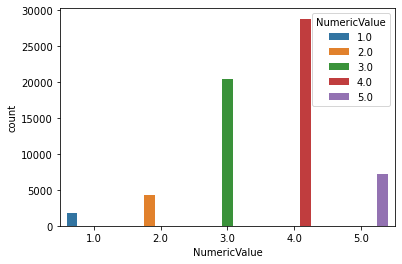

In [208]:
sns.countplot(x="NumericValue",hue="NumericValue",data=cpe_data)

<AxesSubplot:xlabel='Segment', ylabel='ACR revenue'>

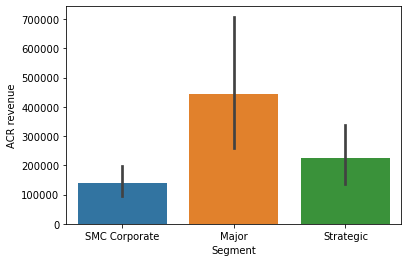

In [209]:
sns.barplot(x="Segment",y="ACR revenue", data=df)

<AxesSubplot:xlabel='Segment', ylabel='count'>

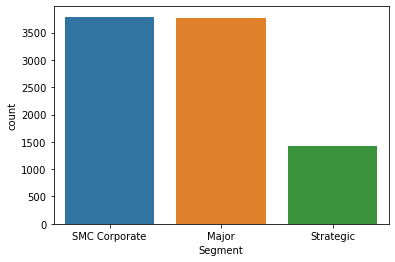

In [210]:
sns.countplot(x="Segment",data=df)

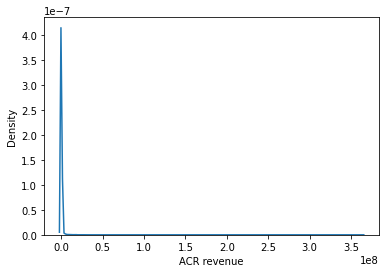

In [211]:
sns.kdeplot(x=df['ACR revenue']) 
plt.show()

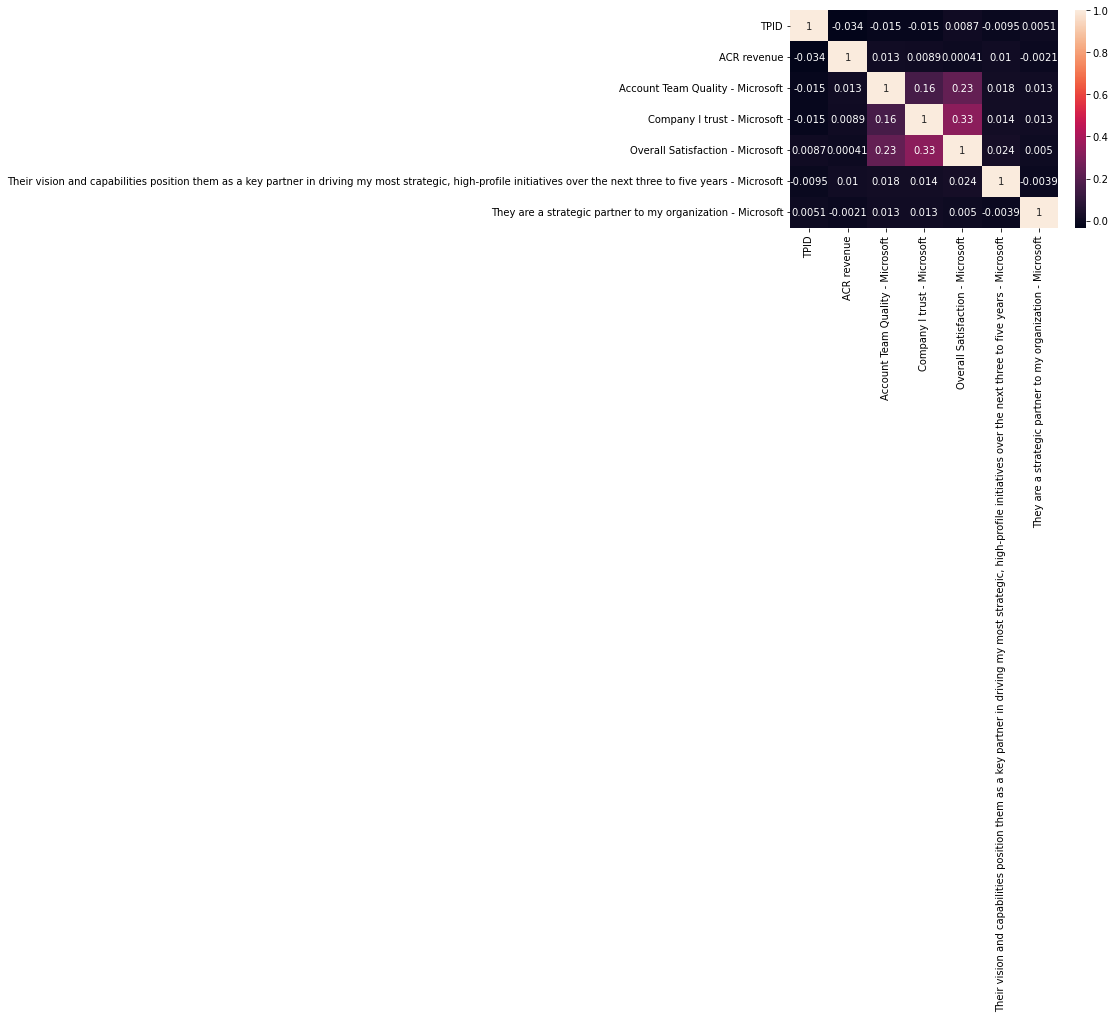

In [212]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## model


## outlier

In [ ]:
x=pred_df[["TPID","NumericValue","FY22-Q1"]]


In [ ]:
x

In [ ]:
x["FY22-Q1"]=(x["FY22-Q1"])

In [ ]:
x.drop(x[x["FY22-Q1"]<=0].index,inplace=True)

In [ ]:
x["FY22-Q1"].min()

In [ ]:
x

In [ ]:
log_data=np.log(x["FY22-Q1"])

In [ ]:
log_data

In [ ]:
x.skew()

In [ ]:
x["log_trans"]=list(log_data)

In [ ]:
x

In [ ]:
x.skew()

In [ ]:
sns.boxplot(x["log_trans"])

In [ ]:
l=list(np.where(x['log_trans']<1))

In [ ]:
l

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(x['FY22-Q1']))
print(z)

In [ ]:
print(np.where(z > 3))

In [ ]:
Q1 = np.percentile(x['FY22-Q1'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(x['FY22-Q1'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [ ]:
IQR

In [ ]:
# Above Upper bound
print(x[x['FY22-Q1'] >= (Q3+1.5*IQR)])
 



In [ ]:
new_df=x[x['FY22-Q1'] <= (Q3+1.5*IQR)]

In [ ]:
new_df.skew()

In [ ]:
new_df1=x[["log_trans"]]

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)

In [ ]:
output=km.fit_predict(new_df1)

In [ ]:
x["group"]=list(output)

In [ ]:
x["FY22-Q1"].max()

In [ ]:
group1=x.query('group==0')['FY22-Q1']

In [ ]:
group1.min()

In [ ]:
group1.max()

In [ ]:
group2=x.query('group==1')['FY22-Q1']

In [ ]:
group2.min()

In [ ]:
group2.max()

In [ ]:
group3=x.query('group==2')['FY22-Q1']

In [ ]:
group3.max()

In [ ]:
group3.min()

In [ ]:
group4=x.query('group==3')['FY22-Q1']

In [ ]:
group4.min()

In [ ]:
group4.max()

In [ ]:
group5=x.query('group==4')['FY22-Q1']

In [ ]:
group5.min()

In [ ]:
group5.max()

In [ ]:
x["log_trans"].hist()

In [ ]:
x["log_trans"]

In [ ]:
sns.kdeplot(x["log_trans"])

In [ ]:
# Below Lower bound
lower = x['FY22-Q1'] <= (Q1-1.5*IQR)

print(np.where(lower))

In [ ]:
''' Removing the Outliers '''
#df_boston.drop(upper[0], inplace = True)
#df_boston.drop(lower[0], inplace = True)

In [ ]:
#checking for skewness

""" The variables with skewness > 1  are highly positively skewed.
The variables with skewness < -1 are highly negatively skewed.
The variables with 0.5 < skewness < 1  are moderately positively skewed.
The variables with -0.5 < skewness < -1  are moderately negatively skewed.
And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed 
"""
#highly possitive skew data


In [ ]:
x.skew()

In [ ]:
x["FY22-Q1"].hist()

In [ ]:
sns.kdeplot(x["FY22-Q1"])

In [ ]:
upper1

In [ ]:
x.drop(upper1[0],inplace=True,axis=0)